## Tugas Akhir Data Mining 
## "Mengklasifikasi Data Penipuan Transaksi Menggunakan Kartu Kredit Dengan Metode Naive Bayes, K-NN,  dan Logistic Regression"

## Perkenalan

Nama : Syaiful Rizal Sidiq

NIM : A11.2021.13849

Kelas : A11.4404

## Abstraksi

Penipuan dalam transaksi kartu kredit merupakan masalah serius yang perlu ditangani. Masyarakat yang semakin banyak menggunakan kartu kredit membuat tingkat penipuan transaksi kartu kredit semakin meningkat. Experimen ini  menggunakan credit  card  fraud  dataset yang berasal dari salah satu instansi, terdiri  dari 999.999 ribu  data  yang  didapatkan  dari  Kaggle. 

Melihat itu tujuan utama dari dataset ini adalah unutk mengklasifikasikan apakah akan terjadi penipuan terhadap suatu transaksi menggunakan kartu credit berikutnya berdasarkan data transaksi kartu kredit sebelumnya. Untuk variabel targetnya adalah fraud atau "penipuan" yang menunjukkan apakah dari transaksi tersbut termasuk penipuan atau tidak. selain itu dataset ini juga berisi beberapa variabel input seperti Jarak dari rumah ke lokasi transaksi, Jarak dari transaksi terakhir yang terjadi, Rasio antara harga pembelian dengan harga pembelian median, Apakah transaksi dilakukan oleh retailer yang sama, Apakah transaksi dilakukan melalui chip pada kartu kredit, Apakah transaksi dilakukan dengan menggunakan nomor PIN, dan Apakah transaksi dilakukan secara online.


beberapa eksperimen untuk analasis dan klasifikasi yang dapat dilakukan dengan dataset credit  card  fraud adalah :

    1. Klasifikasi apakah transaksi akan terindentifikasi transaksi penipuan atau tidak
    2. Membandingkan dengan tiga metode antara Naive Bayes, K-NN, dan Logistic Regression, manakah metode yang paling baik dalam mendekteksi penipuan transaksi kartu kredit

Dataset credit  card  fraud penting karena dapat membantu dalam mengklasifikasi tranasaksi kartu credit kedepannya dan membantu perusahaan penerbit kartu kredit dapat membangun model klasifikasi yang akurat, sehingga harapanya dapat melawan penipuan, melindungi pemegang kartu, dan meminimalkan kerugian finansial. 


## Objektif
Tugas Akhir ini dibuat guna mengevaluasi konsep Naive Bayes, K-NN, dan Logistic Regression sebagai berikut:

● Mampu memahami konsep Classification dengan Naive Bayes, K-NN, dan Logistic Regression

● Mampu mempersiapkan data untuk digunakan dalam model Naive Bayes, K-NN, dan Logistic Regression

● Mampu mengimplementasikan Naive Bayes, K-NN, dan Logistic Regression untuk membuat prediksi


## Import Library 

In [1]:
#untuk dataframe
import pandas as pd

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

## Data Loading
### Memanggil Data set

In [2]:
# Import dan Membaca dataset
df = pd.read_csv("card_transdata.csv")  

#Menampilkan dataset 5 teratas
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Melihat ukuran data(baris, kolom)

In [3]:
df.shape

(1000000, 8)

## Pengecekan Nama Kolom

In [4]:
df.columns.values

array(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'], dtype=object)

## Penjelasan Tiap kolom

1. distance_from_home: Jarak dari rumah ke lokasi transaksi.
2. distance_from_last_transaction: Jarak dari transaksi terakhir yang terjadi.
3. ratio_to_median_purchase_price: Rasio antara harga pembelian dengan harga pembelian median.
4. repeat_retailer: Apakah transaksi dilakukan oleh retailer yang sama.
5. used_chip: Apakah transaksi dilakukan melalui chip pada kartu kredit.
6. used_pin_number: Apakah transaksi dilakukan dengan menggunakan nomor PIN.
7. online_order: Apakah transaksi dilakukan secara online.
8. fraud: Apakah transaksi tersebut merupakan penipuan.

## Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Deskriptif Statistik

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Pengecekan Data yang duplikat untuk semua kolom

In [7]:
df.duplicated().sum()

0

## Mengecek apakah ada atribut yang missing value

Proses mengecek data pada setiap atribut yang memiliki missing value kemudian menjumlahkannya

In [8]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Dari pengecekan diatas tidak terdapat atribut yang memiliki missing value, maka proses pembersihan data selesai

## Normalisasi Dataset

Dikarenakan tidak terdapt missing value, maka dilanjutkan ke prosessing berikutnya


## Explorasi data Analist
### Target : Fraud

Sekarang kita akan melihat nilai NO (tidak penipuan) dan YES (penipuan) pada kolom fraud menggunakan BarChart

0.0    912597
1.0     87403
Name: fraud, dtype: int64


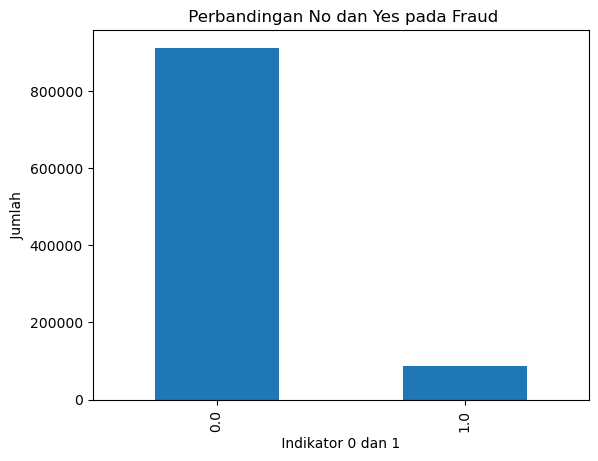

In [9]:
df["fraud"].value_counts().plot(kind="bar")
plt.title(" Perbandingan No dan Yes pada Fraud")
plt.xlabel(" Indikator 0 dan 1 ")
plt.ylabel(" Jumlah ")
print(df["fraud"].value_counts())

## Keterangan

BarChart diatas menunjukan hasil perbandingan nilai No dan Yes pada kolom Fraud

## Kesimpulan dari analisis Target RainTomorrow
Kesimpulan

Hasil dari BarChart diatas menunjukkan, Hasil "NO" ada pada angka 912.597 dan "YES" ada pada angka 87.403. Dari hasil BarChart diatas menunjukan bahwa jumlah hasil prediksi "NO" menghasilkan angka yang sangat tinggi sekali. Hasil ini membuktikan bahwa hasil nilai"NO" lebih mendominasi dari pada nilai "YES" dan jumlah selisihnya sangat jauh. Hasil Dari "YES" dan "NO" ini harus dilakukan balancing data. Jikalau tidak dilakukan Balancing data, Model akan cenderung memprediksi kelas mayoritas karena data mayoritas memiliki lebih banyak sampel daripada data minoritas.

## PreProcesing Data

### Balancing Data
Dikarenakan Jumlah pada Target "NO" Sangatlah tinggi. Maka dilakukan UnderSampling pada data yang ini.

In [10]:
#Menjumlahkan data pada kolom fraud
countRT = df["fraud"].value_counts()
countRT

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [11]:
n = min(countRT)
n

87403

In [12]:
subset_yes = df[df['fraud'] == 1].sample(n=87403, random_state=42)
subset_no = df[df['fraud'] == 0].sample(n=87403, random_state=42)

In [13]:
new_df = pd.concat([subset_yes, subset_no])

In [14]:
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
909977,25.920200,10.792762,9.541436,1.0,0.0,0.0,1.0,1.0
649305,129.610251,1.132247,0.802504,1.0,0.0,0.0,1.0,1.0
364031,117.420499,4.914930,0.321369,1.0,0.0,0.0,1.0,1.0
161491,176.667414,1.229757,3.845739,1.0,0.0,0.0,1.0,1.0
65707,26.138134,0.875708,9.752672,1.0,0.0,0.0,1.0,1.0


In [15]:
new_df["fraud"].value_counts()

1.0    87403
0.0    87403
Name: fraud, dtype: int64

1.0    87403
0.0    87403
Name: fraud, dtype: int64


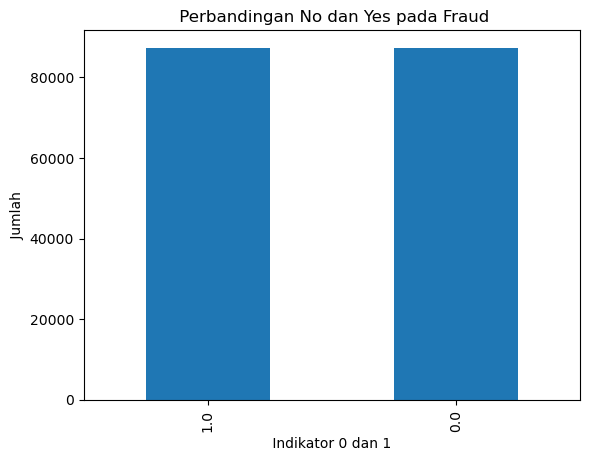

In [16]:
new_df["fraud"].value_counts().plot(kind="bar")
plt.title(" Perbandingan No dan Yes pada Fraud")
plt.xlabel(" Indikator 0 dan 1 ")
plt.ylabel(" Jumlah ")
print(new_df["fraud"].value_counts())

In [17]:
new_df.shape

(174806, 8)

Proses Undersampling sudah selesai, jumlah data menjadi balance.

## Pendefinisian Model

In [18]:
mode_NB = GaussianNB()
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_logreg = LogisticRegression()

## Memisahkan fitur dan label

Dalam proses pemisahan fitur dan label tujuannya adalah untuk mengidentifikasi atribut-atribut yang relevan dan signifikan dalam mempengaruhi nilai target.

In [19]:
X = new_df.drop("fraud", axis=1)
y = new_df["fraud"]

## Pelatihan Model

## Mengklasifikasi menggunakan dengan Naive Bayes

Experimen klasifikasi menggunakan algoritma Naive Bayes Gaussian. Experimen membantu dalam melatih model, melakukan prediksi, dan mengevaluasi performa model dengan menggunakan metrik evaluasi seperti akurasi, presisi, recall, nilai AUC dan f1-score. Pada Klasifikasi ini saya lakukan 3 kali percobaan dengan menggunakan data testing (data uji)  sebesar 20%, 30%, dan 40%



Accuracy: 0.7877409759167096
Precision: 0.7135029520451939
Recall: 0.9613139521574912
F1-score: 0.8190750176755979
AUC: 0.787810452748462
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.61      0.74     17488
         1.0       0.71      0.96      0.82     17474

    accuracy                           0.79     34962
   macro avg       0.83      0.79      0.78     34962
weighted avg       0.83      0.79      0.78     34962

Confusion Matrix:
 [[10743  6745]
 [  676 16798]]


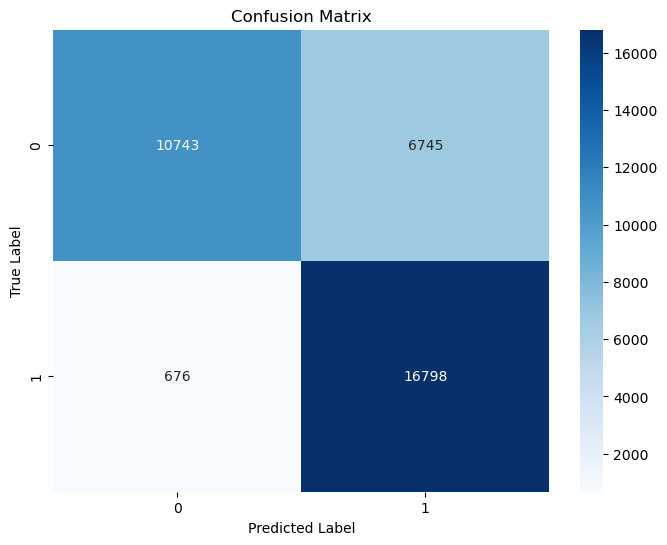

In [20]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek klasifikasi Naive Bayes (Gaussian Naive Bayes)
model_nb = GaussianNB()

# Melatih model dengan data latih
model_nb.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_nb.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Accuracy: 0.7882041112085733
Precision: 0.7142573808579362
Recall: 0.9610384659372498
F1-score: 0.8194717594473792
AUC: 0.788138171582184
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.62      0.74     26211
         1.0       0.71      0.96      0.82     26231

    accuracy                           0.79     52442
   macro avg       0.83      0.79      0.78     52442
weighted avg       0.83      0.79      0.78     52442

Confusion Matrix:
 [[16126 10085]
 [ 1022 25209]]


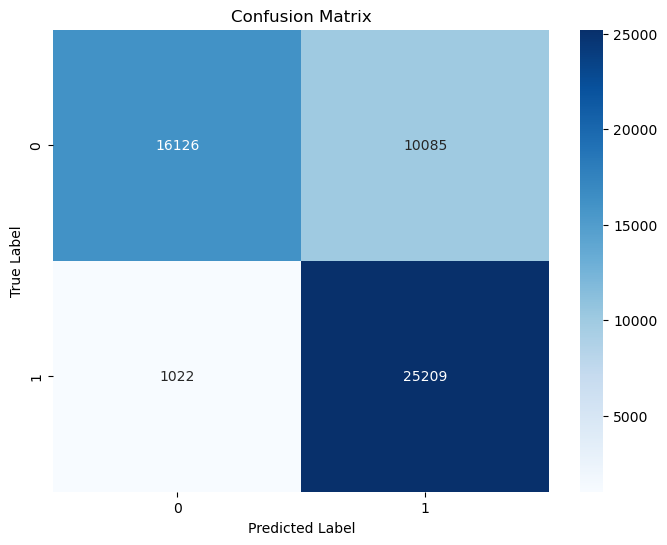

In [21]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat objek klasifikasi Naive Bayes (Gaussian Naive Bayes)
model_nb = GaussianNB()

# Melatih model dengan data latih
model_nb.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_nb.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Accuracy: 0.7879381605480315
Precision: 0.7138945491594498
Recall: 0.9614373106168886
F1-score: 0.8193777864399348
AUC: 0.7878363680241651
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.61      0.74     34941
         1.0       0.71      0.96      0.82     34982

    accuracy                           0.79     69923
   macro avg       0.83      0.79      0.78     69923
weighted avg       0.83      0.79      0.78     69923

Confusion Matrix:
 [[21462 13479]
 [ 1349 33633]]


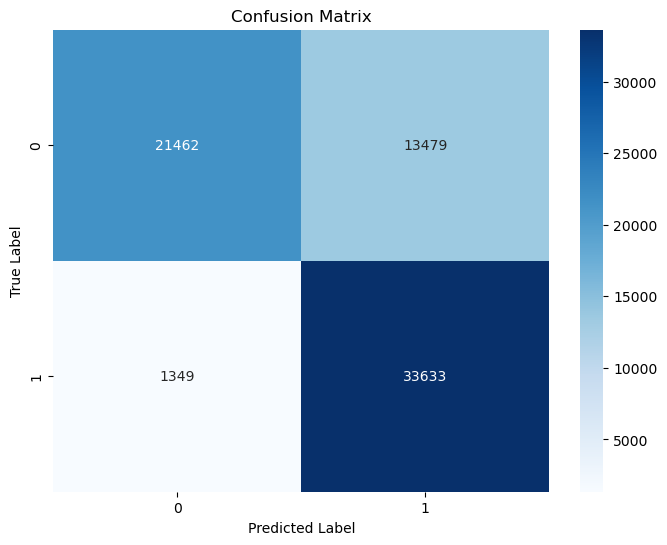

In [22]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membuat objek klasifikasi Naive Bayes (Gaussian Naive Bayes)
model_nb = GaussianNB()

# Melatih model dengan data latih
model_nb.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_nb.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Kesimpulannya
Model Naive Bayes (Gaussian Naive Bayes) berhasil dengan baik dalam melakukan klasifikasi pada dataset ini dengan berbagai ukuran data uji. Performa model menunjukkan akurasi, presisi, recall, dan F1-score yang tinggi, serta keseimbangan yang baik antara presisi dan recall dengan tingkat akurasi rata rata ketiganya sebesar 74%.

## Mengklasifikasi menggunakan dengan "K-Nearest Neighbors

Experimen klasifikasi menggunakan algoritma K-Nearest Neighbors. Experimen membantu dalam melatih model, melakukan prediksi, dan mengevaluasi performa model dengan menggunakan metrik evaluasi seperti akurasi, presisi, recall, nilai AUC dan f1-score. Pada Klasifikasi ini saya lakukan 3 kali percobaan dengan menggunakan data testing (data uji) sebesar 20%, 30%, dan 40%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9700818031005092
Precision: 0.9462190352020861
Recall: 0.9967952386402655
F1-score: 0.9708488935956747
AUC: 0.9700924958068664
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     17488
         1.0       0.95      1.00      0.97     17474

    accuracy                           0.97     34962
   macro avg       0.97      0.97      0.97     34962
weighted avg       0.97      0.97      0.97     34962

Confusion Matrix:
 [[16498   990]
 [   56 17418]]


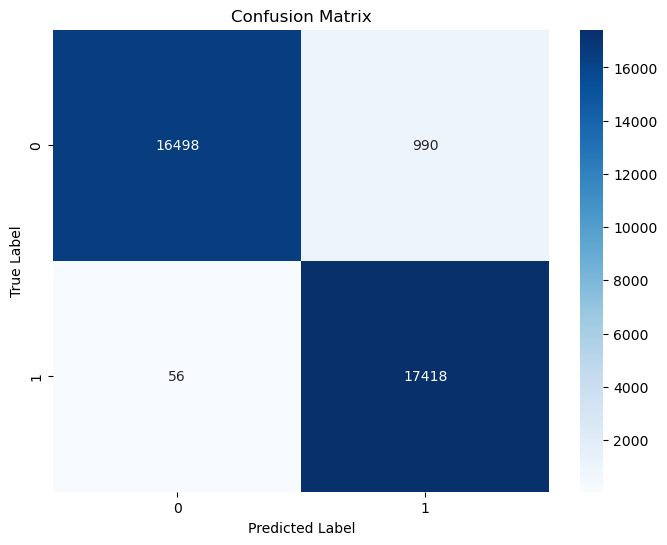

In [23]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek klasifikasi K-Nearest Neighbors dengan k = 3
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
model_KNN.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_KNN.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.96891804279013
Precision: 0.9442377839575282
Recall: 0.9967214364683009
F1-score: 0.9697700296735905
AUC: 0.9689074352613527
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     26211
         1.0       0.94      1.00      0.97     26231

    accuracy                           0.97     52442
   macro avg       0.97      0.97      0.97     52442
weighted avg       0.97      0.97      0.97     52442

Confusion Matrix:
 [[24667  1544]
 [   86 26145]]


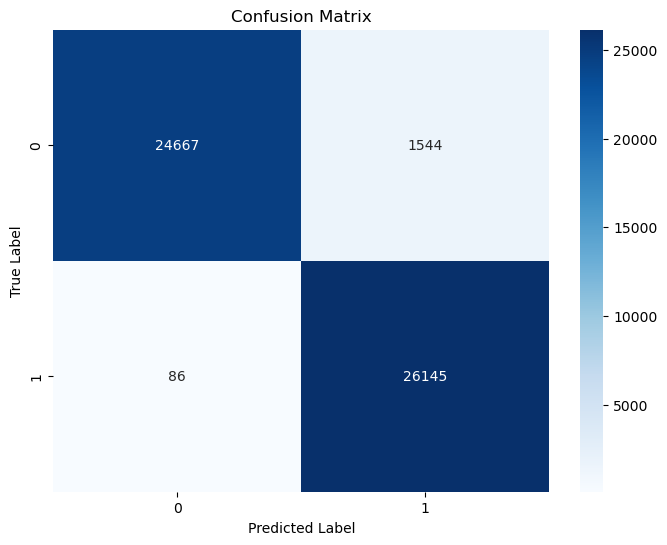

In [24]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat objek klasifikasi K-Nearest Neighbors dengan k = 3
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
model_KNN.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_KNN.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9677645409950946
Precision: 0.942653105388444
Recall: 0.9961694585786977
F1-score: 0.9686726893676164
AUC: 0.9677478757362165
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     34941
         1.0       0.94      1.00      0.97     34982

    accuracy                           0.97     69923
   macro avg       0.97      0.97      0.97     69923
weighted avg       0.97      0.97      0.97     69923

Confusion Matrix:
 [[32821  2120]
 [  134 34848]]


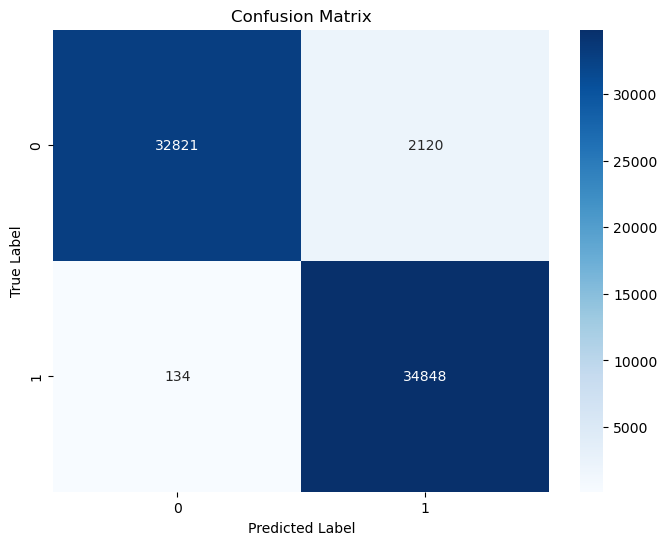

In [25]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membuat objek klasifikasi K-Nearest Neighbors dengan k = 3
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
model_KNN.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_KNN.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Kesimpulan

Kesimpulan pengujian model Model K-Nearest Neighbors berhasil dengan baik dalam melakukan klasifikasi pada eksperimen ini dengan berbagai ukuran data uji. Performa model menunjukkan akurasi, presisi, recall, dan F1-score yang tinggi, serta keseimbangan yang baik antara presisi dan recall dengan tingkat akurasi rata rata ketiganya sebesar 97%.

## Mengklasifikasi menggunakan dengan Logistic Regression

Dalam eksperimen ini, kita akan menggunakan algoritma Logistic Regression untuk klasifikasi. Eksperimen ini bertujuan untuk melatih model Logistic Regression, melakukan prediksi, dan mengevaluasi performa model dengan menggunakan metrik evaluasi seperti akurasi, presisi, recall, nilai AUC dan f1-score. Klasifikasi ini akan diuji dengan 3 kali percobaan, masing-masing menggunakan data testing (data uji) sebesar 20%, 30%, dan 40%.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9397631714432813
Precision: 0.9322682268226823
Recall: 0.9483804509557057
F1-score: 0.9402553191489361
AUC: 0.9397666207203048
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     17488
         1.0       0.93      0.95      0.94     17474

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962

Confusion Matrix:
 [[16284  1204]
 [  902 16572]]


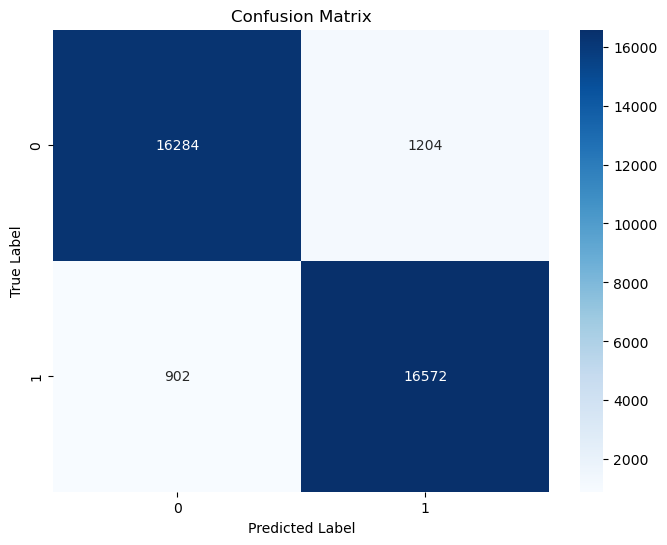

In [26]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek klasifikasi Logistic Regression
model_logreg = LogisticRegression()

# Melatih model dengan data latih
model_logreg.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_logreg.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9412493802677243
Precision: 0.9325809103819418
Recall: 0.9513171438374443
F1-score: 0.9418558568759553
AUC: 0.9412455392225259
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     26211
         1.0       0.93      0.95      0.94     26231

    accuracy                           0.94     52442
   macro avg       0.94      0.94      0.94     52442
weighted avg       0.94      0.94      0.94     52442

Confusion Matrix:
 [[24407  1804]
 [ 1277 24954]]


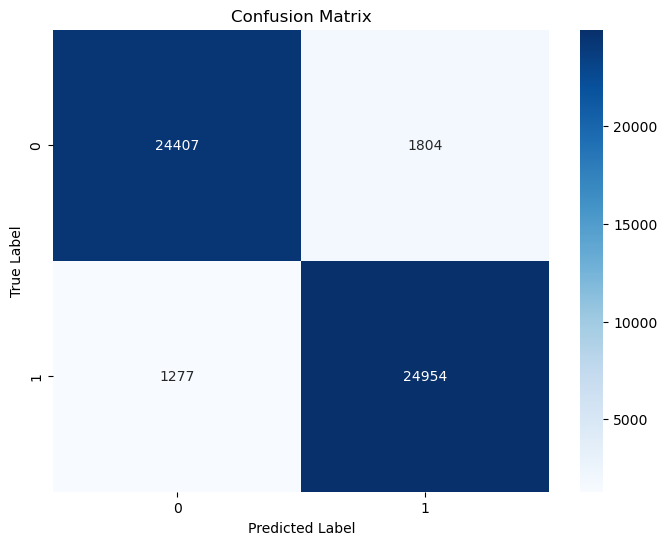

In [27]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat objek klasifikasi Logistic Regression
model_logreg = LogisticRegression()

# Melatih model dengan data latih
model_logreg.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_logreg.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9416071964875649
Precision: 0.9328439750091054
Recall: 0.9518037848036133
F1-score: 0.9422285107888221
AUC: 0.9416012141155525
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     34941
         1.0       0.93      0.95      0.94     34982

    accuracy                           0.94     69923
   macro avg       0.94      0.94      0.94     69923
weighted avg       0.94      0.94      0.94     69923

Confusion Matrix:
 [[32544  2397]
 [ 1686 33296]]


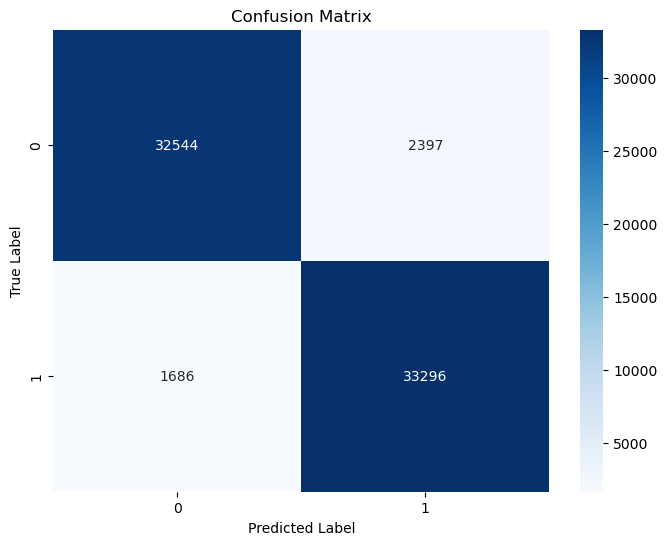

In [28]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membuat objek klasifikasi Logistic Regression
model_logreg = LogisticRegression()

# Melatih model dengan data latih
model_logreg.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_logreg.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Kesimpulan
Dengan melakukan eksperimen menggunakan model Logistic Regression ini, berhasil dengan baik dalam melakukan klasifikasi pada dataset ini dengan berbagai ukuran data uji. Performa model menunjukkan akurasi yang tinggi dan keseimbangan yang baik antara presisi dan recall dengan tingkat akurasi rata rata ketiganya sebesar 94%.

## Model Inference

Melakukkan klasifikasi dengan menginputkan data baru menggunakan model yang telah dilatih sebelumnya yakni model K-Nearest Neighbors dengan menggunakan data testing sebesar 20%.

In [29]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek klasifikasi K-Nearest Neighbors dengan k = 3
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
model_KNN.fit(X_train, y_train)

# Memasukkan data baru yang ingin diprediksi () 7 inputan)
new_data1 = [[5.935436457, 9.65423454333, 63.355, 1, 1, 1, 1]]

# Memprediksi label untuk data baru
y_pred = model_KNN.predict(new_data1)

# Menghasilkan hasil prediksi
if y_pred[0] == 0:
    result = "Tidak termasuk transaksi penipuan"
else:
    result = "Termasuk transaksi penipuan"

print("Hasil Prediksi:", result)

Hasil Prediksi: Termasuk transaksi penipuan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Dari klasifikasi diatas Dalam proses testing menggunakan model K-Nearest Neighbors (KNN) dengan k = 3, dibagi dataset menjadi data latih dan data uji dengan proporsi 80:20. Kemudian, model KNN dilatih menggunakan data latih. Setelah itu, dimasukkan data baru yang ingin diprediksi dengan 7 inputan fitur. Hasil prediksi menunjukkan bahwa data baru tersebut termasuk dalam transaksi penipuan.

In [30]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek klasifikasi K-Nearest Neighbors dengan k = 3
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
model_KNN.fit(X_train, y_train)

# Memasukkan data baru yang ingin diprediksi () 7 inputan)
new_data2 = [[534, 9433, 623, 1, 0, 0, 1]]

# Memprediksi label untuk data baru
y_pred = model_KNN.predict(new_data2)

# Menghasilkan hasil prediksi
if y_pred[0] == 0:
    result = "Tidak termasuk transaksi penipuan"
else:
    result = "Termasuk transaksi penipuan"

print("Hasil Prediksi:", result)

Hasil Prediksi: Tidak termasuk transaksi penipuan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Dari klasifikasi diatas Dalam proses testing menggunakan model K-Nearest Neighbors (KNN) dengan k = 3, dibagi dataset menjadi data latih dan data uji dengan proporsi 80:20. Kemudian, model KNN dilatih menggunakan data latih. Setelah itu, dimasukkan data baru yang ingin diprediksi dengan 7 inputan fitur. Hasil prediksi menunjukkan bahwa data baru tersebut tidak termasuk dalam transaksi  penipuan.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


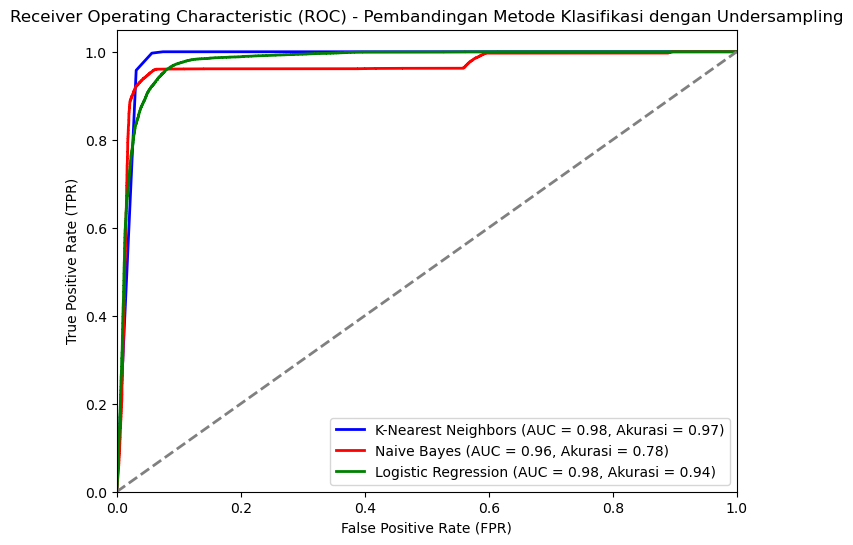

In [31]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Metode 1: K-Nearest Neighbors (KNN) dengan Undersampling
# Melakukan undersampling dengan RandomUndersampler pada data latih
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Membuat objek klasifikasi K-Nearest Neighbors dengan k = 3
model_knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih yang telah di-undersampling
model_knn.fit(X_train_undersampled, y_train_undersampled)

# Memprediksi probabilitas label untuk data uji setelah undersampling
y_prob_knn = model_knn.predict_proba(X_test)[:, 1]

# Mendapatkan nilai False Positive Rate (FPR), True Positive Rate (TPR), dan ambang batas (threshold) dengan data yang telah di-undersampling
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

# Menghitung Area Under Curve (AUC) dengan data yang telah di-undersampling
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Menampilkan kurva ROC KNN dengan data yang telah di-undersampling
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='K-Nearest Neighbors (AUC = %.2f, Akurasi = %.2f)' % (roc_auc_knn, 0.97))

# Metode 2: Naive Bayes dengan Undersampling
# Melakukan undersampling dengan RandomUndersampler pada data latih
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Membuat objek klasifikasi Naive Bayes (Gaussian Naive Bayes)
model_nb = GaussianNB()

# Melatih model dengan data latih yang telah di-undersampling
model_nb.fit(X_train_undersampled, y_train_undersampled)

# Memprediksi probabilitas label untuk data uji setelah undersampling
y_prob_nb = model_nb.predict_proba(X_test)[:, 1]

# Mendapatkan nilai False Positive Rate (FPR), True Positive Rate (TPR), dan ambang batas (threshold) dengan data yang telah di-undersampling
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)

# Menghitung Area Under Curve (AUC) dengan data yang telah di-undersampling
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Menampilkan kurva ROC Naive Bayes dengan data yang telah di-undersampling
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (AUC = %.2f, Akurasi = %.2f)' % (roc_auc_nb, 0.78))

# Metode 3: Logistic Regression dengan Undersampling
# Melakukan undersampling dengan RandomUndersampler pada data latih
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Membuat objek klasifikasi Logistic Regression
model_logreg_undersampled = LogisticRegression()

# Melatih model dengan data latih yang telah di-undersampling
model_logreg_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Memprediksi probabilitas label untuk data uji setelah undersampling
y_prob_logreg = model_logreg_undersampled.predict_proba(X_test)[:, 1]

# Mendapatkan nilai False Positive Rate (FPR), True Positive Rate (TPR), dan ambang batas (threshold) dengan data yang telah di-undersampling
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)

# Menghitung Area Under Curve (AUC) dengan data yang telah di-undersampling
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Menampilkan kurva ROC Logistic Regression dengan data yang telah di-undersampling
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='Logistic Regression (AUC = %.2f, Akurasi = %.2f)' % (roc_auc_logreg, 0.94))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Pembandingan Metode Klasifikasi dengan Undersampling')
plt.legend(loc="lower right")
plt.show()


# Kesimpulan

Pada  eksperimen ini dilakukan perbandingan  tiga  algoritma (Naïve  Bayes, k-NN  dan Logistic Regression) untuk  mengklasifikasi credit  card  fraud dataset. Data  yang  digunakan berjumlah 999.999 ribu.  Data sendiri bersifat tidak seimbang,sehingga dilakukan penyeimbangan data dengan cara menerapkan oversampling pada model klasifikasi yang dibuat. Hasil  pengujian  menunjukkan  bahwa berhasil diterapkan dalam melakukan deteksi penipuan transaksi karu kredit, hal tersebut dibuktikan dengan nilai AUC score dari masing-masing algoritma dan teknik oversampling yang didapat > 0,7 yang teramasuk kedalam kelompok kinerja klasifikasi baik. 

Pada algoritma k-NN menghasilkan  nilai  akurasi tertinggi  yaitu  97%  dan nilai  AUC  0,97; Logistic Regression menghasilkan nilai akurasi 94% dan nilai AUC 0,94, sedangakan Naïve  Bayes  dengan  nilai  akurasi  79%  dan  nilai  AUC 0,78. Melihat hasil evaluasi tersebut didapat algoritma k-NN dengan teknik undersampling terbukti cocok untuk deteksi penipuan transaksi kartu kredit dengan masing-msing nilai didapat yaitu: 

Accuracy: 0.9700818031005092   
Precision: 0.9462190352020861        
Recall: 0.9967952386402655           
F1-score: 0.9708488935956747        
AUC: 0.9700924958068664         

Berdasarkan kurva ROC yang membandingkan tiga metode klasifikasi, yaitu K-Nearest Neighbors (KNN), Naive Bayes, dan Logistic Regression dengan menggunakan undersampling, dapat disimpulkan bahwa K-Nearest Neighbors (KNN) memiliki kinerja terbaik dengan nilai AUC dan akurasi tertinggi dibandingkan dengan Naive Bayes dan Logistic Regression.

Dalam eksperimen ini, algoritma K-Nearest Neighbors (KNN) berhasil mencapai akurasi sebesar 97% dan nilai AUC sebesar 0,97 dalam melakukan deteksi penipuan pada transaksi kartu kredit. Hal ini menunjukkan bahwa KNN merupakan pilihan yang sangat baik dalam pemecahan masalah klasifikasi credit card fraud, karena dapat mengenali penipuan dengan tingkat akurasi yang sangat tinggi.

Sebaliknya, meskipun Naive Bayes dan Logistic Regression juga menghasilkan kinerja yang baik, dengan akurasi 79% dan 94% serta AUC 0,78 dan 0,94 masing-masing, namun performa KNN tetap menjadi yang terbaik di antara ketiganya.

Oleh karena itu, dari hasil eksperimen ini, dapat disarankan bahwa algoritma K-Nearest Neighbors (KNN) adalah pilihan yang paling baik untuk digunakan dalam melakukan deteksi penipuan pada transaksi kartu kredit berdasarkan data yang telah digunakan dalam eksperimen ini.

## Referensi

Sahroni, M. Y., Setifani, N. A., & Fitriani, D. N. 2021. "Comparative analysis of the Naïve Bayes, k-Nearest Neighbor, and Neural Network algorithms for class-imbalanced data problems in the case of credit card fraud dataset." Jurnal Ilmiah Sistem Informasi, 11(2) , 70-72.

Zuhairah, Alma. 2022."Penerapan Algoritma RAndom Forest, Support Vector Machines (SVM) dan Gradient Boosted Tree(GBT) untuk deteksi penipuan(fraud detection) pada transaksi kartu kredit".(Skripsi).Universitas Islam Negeri Syarif Hidayatullah, Jakarta, Indonesia.

Amalia Anjani Arifiyanti, Eka Dyar Wahyuni. "SMOTE: Metode Penyeimbang Kelas pada Klasifikasi Data Mining." SCAN (Jurnal Ilmiah Teknologi Informasi) Vol. XV No. 1, Februari 2020. Program Studi Sistem Informasi, Fakultas Ilmu Komputer, Universitas Pembangunan Nasional "Veteran" Jawa Timur. ISSN 2686-6099.

## Selesai